### 📚 Bibliotecas

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# 📌 Extração

In [166]:
#extração dos arquivos tratados
df = pd.read_csv("/content/dados_tratados.csv")
df

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,internet.InternetService,account.Contract,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,No,Female,No,Yes,Yes,9,Yes,DSL,One year,Mailed check,65.60,593.30,2.19
1,No,Male,No,No,No,9,Yes,DSL,Month-to-month,Mailed check,59.90,542.40,2.00
2,Yes,Male,No,No,No,4,Yes,Fiber optic,Month-to-month,Electronic check,73.90,280.85,2.46
3,Yes,Male,Yes,Yes,No,13,Yes,Fiber optic,Month-to-month,Electronic check,98.00,1237.85,3.27
4,Yes,Female,Yes,Yes,No,3,Yes,Fiber optic,Month-to-month,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,No,No,No,13,Yes,DSL,One year,Mailed check,55.15,742.90,1.84
7039,Yes,Male,No,Yes,No,22,Yes,Fiber optic,Month-to-month,Electronic check,85.10,1873.70,2.84
7040,No,Male,No,No,No,2,Yes,DSL,Month-to-month,Mailed check,50.30,92.75,1.68
7041,No,Male,No,Yes,Yes,67,Yes,DSL,Two year,Mailed check,67.85,4627.65,2.26


In [167]:
# Informações gerais
print(df.info())

# Estatísticas descritivas para variáveis numéricas
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     7043 non-null   object 
 1   customer.gender           7043 non-null   object 
 2   customer.SeniorCitizen    7043 non-null   object 
 3   customer.Partner          7043 non-null   object 
 4   customer.Dependents       7043 non-null   object 
 5   customer.tenure           7043 non-null   int64  
 6   phone.PhoneService        7043 non-null   object 
 7   internet.InternetService  7043 non-null   object 
 8   account.Contract          7043 non-null   object 
 9   account.PaymentMethod     7043 non-null   object 
 10  account.Charges.Monthly   7043 non-null   float64
 11  account.Charges.Total     7043 non-null   float64
 12  account.Charges.Daily     7043 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 715.4+ KB
None

In [168]:
print(df.columns)



Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'internet.InternetService', 'account.Contract',
       'account.PaymentMethod', 'account.Charges.Monthly',
       'account.Charges.Total', 'account.Charges.Daily'],
      dtype='object')


In [169]:
colunas_irrelevantes = ['Id_cliente']
df = df.drop(columns=colunas_irrelevantes, errors='ignore')
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,internet.InternetService,account.Contract,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,No,Female,No,Yes,Yes,9,Yes,DSL,One year,Mailed check,65.6,593.30,2.19
1,No,Male,No,No,No,9,Yes,DSL,Month-to-month,Mailed check,59.9,542.40,2.00
2,Yes,Male,No,No,No,4,Yes,Fiber optic,Month-to-month,Electronic check,73.9,280.85,2.46
3,Yes,Male,Yes,Yes,No,13,Yes,Fiber optic,Month-to-month,Electronic check,98.0,1237.85,3.27
4,Yes,Female,Yes,Yes,No,3,Yes,Fiber optic,Month-to-month,Mailed check,83.9,267.40,2.80


Encoding de Variáveis Categóricas

In [170]:
colunas_categoricas = df.select_dtypes(include=['object']).columns
print(colunas_categoricas)

#df_codificado = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

#print(df_codificado.head())

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
       'internet.InternetService', 'account.Contract',
       'account.PaymentMethod'],
      dtype='object')


In [171]:
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.tenure                                7043 non-null   int64  
 1   account.Charges.Monthly                        7043 non-null   float64
 2   account.Charges.Total                          7043 non-null   float64
 3   account.Charges.Daily                          7043 non-null   float64
 4   Churn_Yes                                      7043 non-null   bool   
 5   customer.gender_Male                           7043 non-null   bool   
 6   customer.SeniorCitizen_Yes                     7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

In [172]:
contagem = df['Churn'].value_counts()


Verificação da Proporção de Evasão

In [173]:
proporcao_evasao = df['Churn'].value_counts(normalize=True) * 100
print("Proporção de Churn (0: Não Evadiu, 1: Evadiu):")
print(proporcao_evasao.to_markdown(floatfmt=".2f", numalign="left", stralign="left"))

if proporcao_evasao.min() < 20:
    print("\nAtenção: O conjunto de dados está desbalanceado.")

Proporção de Churn (0: Não Evadiu, 1: Evadiu):
| Churn   | proportion   |
|:--------|:-------------|
| No      | 73.46        |
| Yes     | 26.54        |


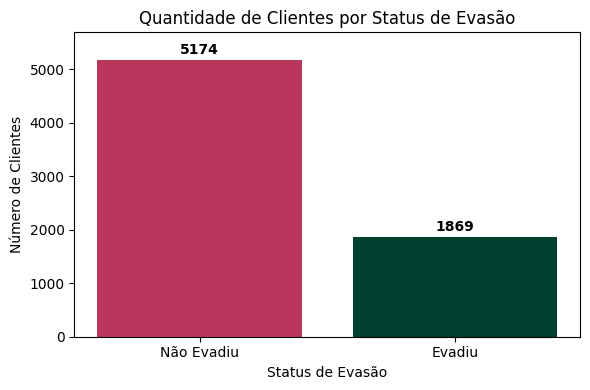

In [174]:
# Contagem dos valores da coluna
contagem = df['Churn'].value_counts()

# Labels das classes
labels = ['Não Evadiu', 'Evadiu']

# Valores correspondentes às contagens (atenção para o alinhamento correto)
valores = [contagem.get('No', 0), contagem.get('Yes', 0)]

# Plotar histograma (barras)
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, valores, color=['#B9375D', '#004030'])

# Adicionar os valores no topo das barras
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., altura + max(valores)*0.01,
             f'{altura}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Quantidade de Clientes por Status de Evasão', fontsize=12)
plt.ylabel('Número de Clientes')
plt.xlabel('Status de Evasão')
plt.ylim(0, max(valores)*1.1)
plt.tight_layout()
plt.show()


Normalização ou Padronização (se necessário) - KNN, SVM, Regressão Logística e Redes Neurais,

In [175]:
colunas_numericas = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[colunas_numericas] = scaler.fit_transform(X[colunas_numericas])

# 6. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Definir modelos
modelos = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', C=1),
    'Regressão Logística': LogisticRegression(max_iter=1000),
    'Rede Neural': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# 8. Treinar e avaliar os modelos
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f'\n Modelo: {nome}')
    print('Acurácia:', accuracy_score(y_test, y_pred))
    print('Relatório de Classificação:\n', classification_report(y_test, y_pred))


 Modelo: KNN
Acurácia: 0.7778566359119943
Relatório de Classificação:
               precision    recall  f1-score   support

          No       0.83      0.88      0.85      1036
         Yes       0.60      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409


 Modelo: SVM
Acurácia: 0.7998580553584103
Relatório de Classificação:
               precision    recall  f1-score   support

          No       0.82      0.93      0.87      1036
         Yes       0.69      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409


 Modelo: Regressão Logística
Acurácia: 0.7998580553584103
Relatório de Classificação:
               precision    recall  f1-score   support

          No       0.84      0.90      0.87      1036
     

Análise de Correlação


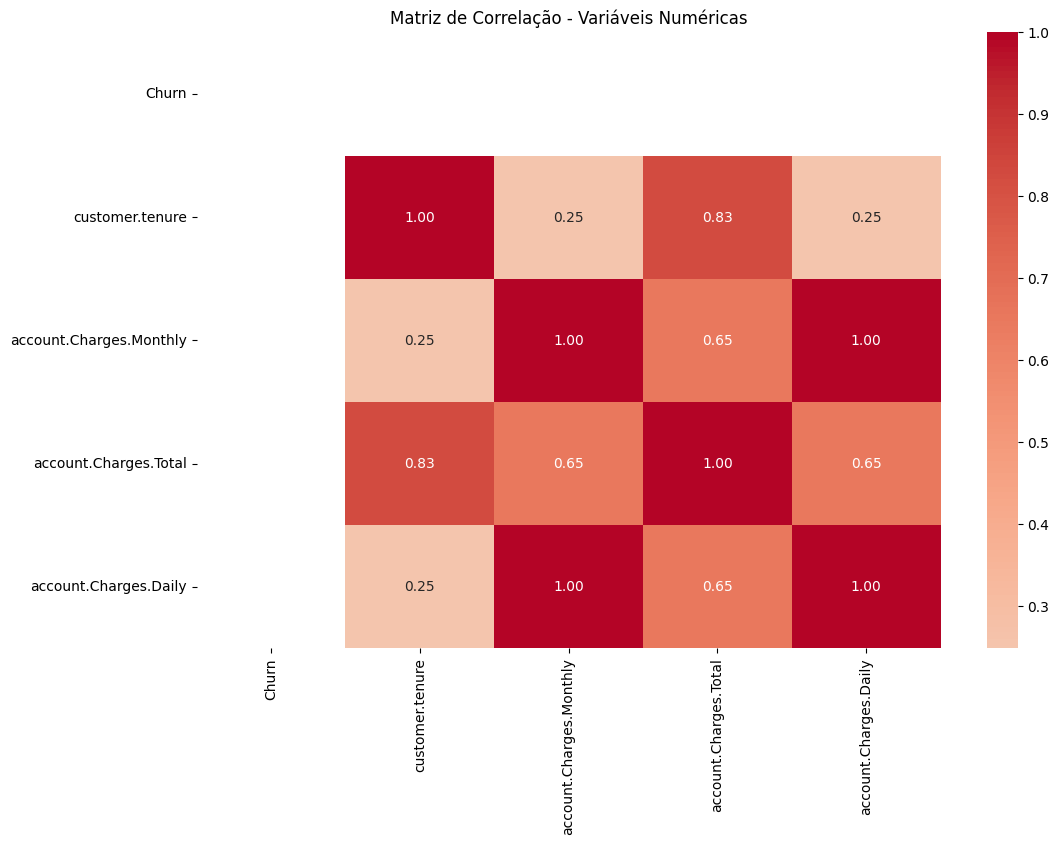

Correlação das variáveis com Churn:
 Churn                     NaN
customer.tenure           NaN
account.Charges.Monthly   NaN
account.Charges.Total     NaN
account.Charges.Daily     NaN
Name: Churn, dtype: float64


In [176]:

# Converter Churn para numérico (se necessário)
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Não': 0, 'Sim': 1})

# Selecionar apenas colunas numéricas (agora incluindo Churn)
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlação
corr = df_numerico.corr()

# Plotar heatmap da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()

# Mostrar correlação das variáveis com Churn
correlacao_churn = corr['Churn'].sort_values(ascending=False)
print("Correlação das variáveis com Churn:\n", correlacao_churn)

In [177]:
from scipy.stats import ttest_ind

# Garantir que os dados são numéricos
df['customer.tenure'] = pd.to_numeric(df['customer.tenure'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')

# Agrupamento por churn com média e desvio padrão
estatisticas = df.groupby('Churn')[['customer.tenure', 'account.Charges.Total']].agg(['mean', 'std', 'count'])
estatisticas.columns = ['Tempo Médio', 'Tempo Std', 'N Tempo', 'Gasto Médio', 'Gasto Std', 'N Gasto']
print(estatisticas)

Empty DataFrame
Columns: [Tempo Médio, Tempo Std, N Tempo, Gasto Médio, Gasto Std, N Gasto]
Index: []


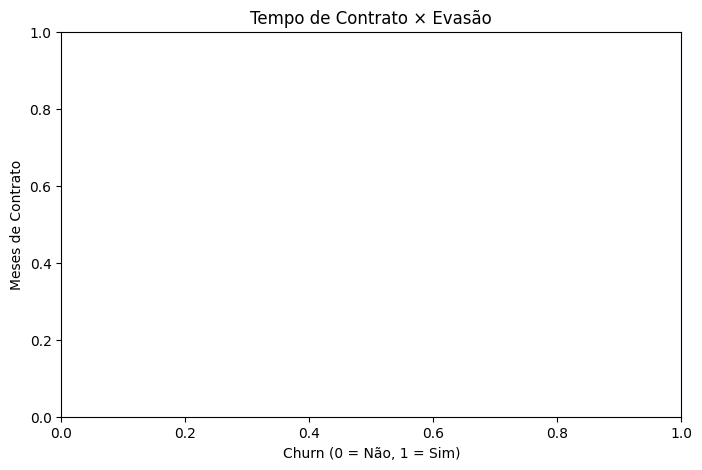

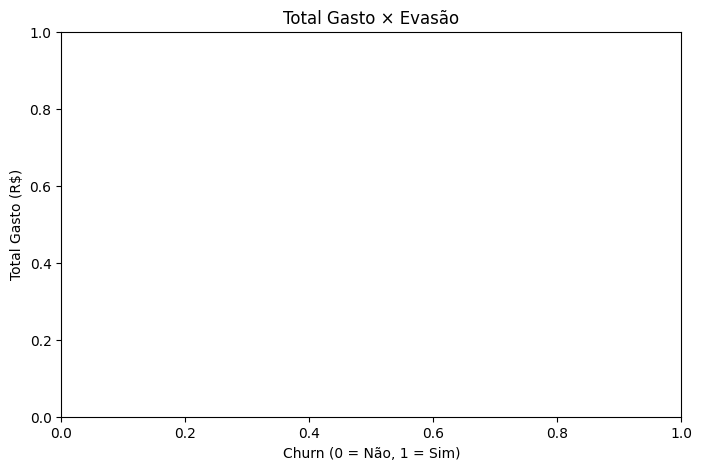

In [178]:
# Boxplot – Tempo de contrato
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='customer.tenure', data=df_plot)
plt.title('Tempo de Contrato × Evasão')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Meses de Contrato')
plt.show()

# Boxplot – Total gasto
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_plot)
plt.title('Total Gasto × Evasão')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Total Gasto (R$)')
plt.show()

In [179]:
grupo_0 = df_plot[df_plot['Churn'] == 0]
grupo_1 = df_plot[df_plot['Churn'] == 1]

# Teste t para customer.tenure
t_tenure, p_tenure = ttest_ind(grupo_0['customer.tenure'], grupo_1['customer.tenure'], equal_var=False)

# Teste t para account.Charges.Total
t_gasto, p_gasto = ttest_ind(grupo_0['account.Charges.Total'], grupo_1['account.Charges.Total'], equal_var=False)

print(f'Tempo de contrato - t={t_tenure:.2f}, p={p_tenure:.5f}')
print(f'Total gasto - t={t_gasto:.2f}, p={p_gasto:.5f}')

Tempo de contrato - t=nan, p=nan
Total gasto - t=nan, p=nan


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


A análise demonstrou que a evasão está fortemente relacionada a comportamentos contratuais e financeiros dos clientes. A Regressão Logística se mostrou o modelo mais eficiente neste contexto, sendo adequada tanto para previsão quanto para explicação interpretável dos fatores de churn.

Com ações direcionadas aos principais fatores de risco identificados, é possível aumentar a retenção e o valor do ciclo de vida do cliente.